<a href="https://colab.research.google.com/github/taji99/python_basic/blob/master/200725_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k平均法
k平均法はk-means clusteringとも呼ばれる教師なし学習の手法です。  
「距離」に基づき、データをk個のクラスタに分類します。

## ●データセットの読み込み
今回は、Irisデータセットを使用します。

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)  # data: 説明変数
iris_df["class"] = iris.target  # target: 目的変数
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


データセットの説明を表示します。

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

各統計量を表示します。

In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


ライブラリseabornの`pairplot`により、説明変数同士、及び説明変数と目的変数の関係を一覧表示します。

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


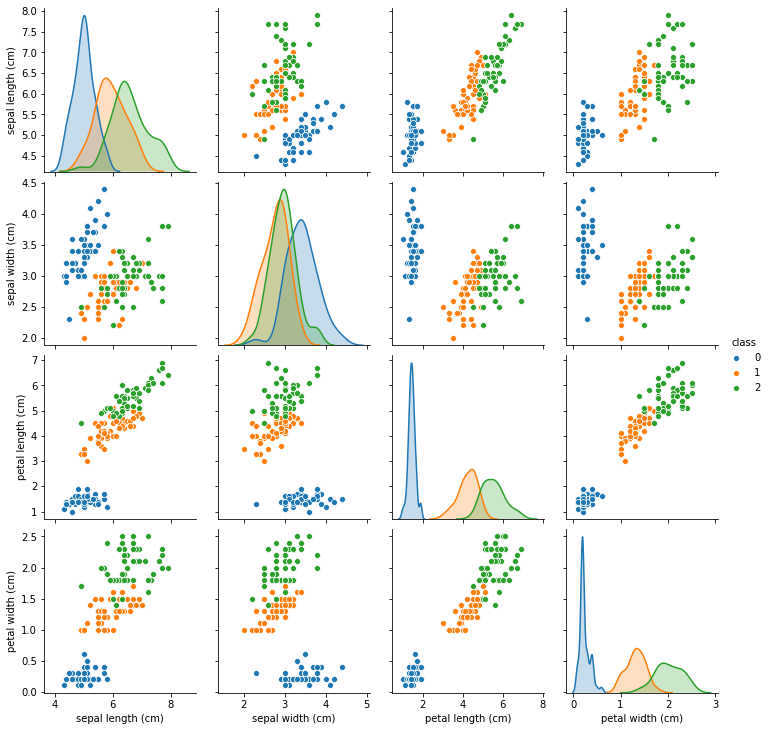

In [4]:
import seaborn as sns

sns.pairplot(iris_df, hue="class")

## ●k平均法
クラスタ分析はデータを似たもの同士グループ分けする分析ですが、k平均法はこのようなクラスタ分析の手法のひとつです。  
以下の手順によりグループ分けが行われます。  

1. 各サンプルに、ランダムにグループを割り当てる
2. 各グループの重心を計算する。
3. 各サンプルが属するグループを、一番重心が近いグループに変更する
4. 変化がなくなれば終了。変化がある場合は 2. に戻る。

以下のコードは、k平均法によりデータをグループ分けします。

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

各グループを散布図で表示します。

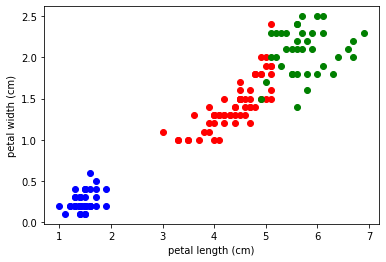

In [6]:
import matplotlib.pyplot as plt

axis_1 = 2
axis_2 = 3

# ラベルが0のグループ
group_0 = iris.data[model.labels_==0]
plt.scatter(group_0[:, axis_1], group_0[:, axis_2], c="red")

# ラベルが1のグループ
group_1 = iris.data[model.labels_==1]
plt.scatter(group_1[:, axis_1], group_1[:, axis_2], c="blue")

# ラベルが2のグループ
group_2 = iris.data[model.labels_==2]
plt.scatter(group_2[:, axis_1], group_2[:, axis_2], c="green")

plt.xlabel(iris.feature_names[axis_1])
plt.ylabel(iris.feature_names[axis_2])
plt.show()

k平均法が機能し、グループ分けが行われたように見えます。  
比較のため、元のデータセットのラベルを使ってグループ分けした結果を表示します。

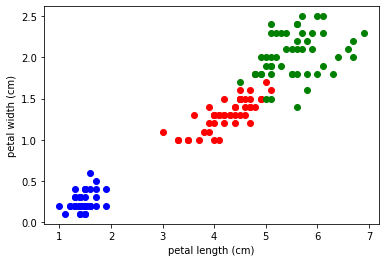

In [7]:
axis_1 = 2
axis_2 = 3

# ラベルが0のグループ
group_0 = iris.data[iris.target==0]
plt.scatter(group_0[:, axis_1], group_0[:, axis_2], c="blue")

# ラベルが1のグループ
group_1 = iris.data[iris.target==1]
plt.scatter(group_1[:, axis_1], group_1[:, axis_2], c="red")

# ラベルが2のグループ
group_2 = iris.data[iris.target==2]
plt.scatter(group_2[:, axis_1], group_2[:, axis_2], c="green")

plt.xlabel(iris.feature_names[axis_1])
plt.ylabel(iris.feature_names[axis_2])
plt.show()

グループの境界が多少異なりますが、属すべきグループを大まかに捉えていることがわかります。